In [13]:
!mkdir -p /content/datasets/mit_indoor

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [8]:
import json
import os

# Replace with your exact Kaggle username and API key
data = {
    "username": "hafsazain",
    "key": "KGAT_0fd620963411f71c82ccbd0cf3d68603"
}

# Create folder if it does not exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Write the file
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(data, f)

# Correct permissions
os.chmod("/root/.kaggle/kaggle.json", 0o600)

print("kaggle.json created successfully!")



kaggle.json created successfully!


In [5]:
!kaggle datasets list -v


ref,title,size,lastUpdated,downloadCount,voteCount,usabilityRating
wardabilal/spotify-global-music-dataset-20092025,Spotify Global Music Dataset (2009–2025),1289021,2025-11-11 09:43:05.933000,9586,215,1.0
rohiteng/amazon-sales-dataset,Amazon Sales Dataset,4037578,2025-11-23 14:29:37.973000,2567,35,1.0
sadiajavedd/students-academic-performance-dataset,Students_Academic_Performance_Dataset,8907,2025-10-23 04:16:35.563000,14499,345,1.0
khushikyad001/ai-impact-on-jobs-2030,AI Impact on Jobs 2030,87410,2025-11-09 17:58:05.410000,5531,127,1.0
sonalshinde123/food-nutrition-dataset-150-everyday-foods,Food Nutrition Dataset,5566,2025-11-15 11:19:11.410000,1515,29,1.0
umitka/food-price-inflation,Food Price Inflation,473026,2025-12-02 12:30:45.013000,773,26,1.0
prince7489/youtube-shorts-performance-dataset,YouTube Shorts Performance Dataset,6541,2025-11-25 09:23:36.147000,1078,33,0.9411765
kundanbedmutha/instagram-analytics-dataset,Instagram Analytics Dataset,1090208,2025-11-19 09:28:48.650000,25

In [7]:
!kaggle datasets download -d itsahmad/indoor-scenes-cvpr-2019 -p /content/datasets/mit_indoor


Dataset URL: https://www.kaggle.com/datasets/itsahmad/indoor-scenes-cvpr-2019
License(s): DbCL-1.0
KGAT_0fd620963411f71c82ccbd0cf3d68603
100% 2.33G/2.34G [00:28<00:00, 254MB/s]
100% 2.34G/2.34G [00:28<00:00, 88.2MB/s]


In [9]:
!unzip /content/datasets/mit_indoor/indoor-scenes-cvpr-2019.zip -d /content/datasets/mit_indoor


Streaming output truncated to the last 5000 lines.
  inflating: /content/datasets/mit_indoor/indoorCVPR_09/Images/studiomusic/solarstudio.jpg  
  inflating: /content/datasets/mit_indoor/indoorCVPR_09/Images/studiomusic/studio14.jpg  
  inflating: /content/datasets/mit_indoor/indoorCVPR_09/Images/studiomusic/studio16.jpg  
  inflating: /content/datasets/mit_indoor/indoorCVPR_09/Images/studiomusic/studio2.jpg  
  inflating: /content/datasets/mit_indoor/indoorCVPR_09/Images/studiomusic/studio21.jpg  
  inflating: /content/datasets/mit_indoor/indoorCVPR_09/Images/studiomusic/studio87.jpg  
  inflating: /content/datasets/mit_indoor/indoorCVPR_09/Images/studiomusic/studio99.jpg  
  inflating: /content/datasets/mit_indoor/indoorCVPR_09/Images/studiomusic/studio_1.jpg  
  inflating: /content/datasets/mit_indoor/indoorCVPR_09/Images/studiomusic/studio_2.jpg  
  inflating: /content/datasets/mit_indoor/indoorCVPR_09/Images/studiomusic/studio_a.jpg  
  inflating: /content/datasets/mit_indoor/indoo

In [10]:
import zipfile
import os

zip_path = "/content/datasets/mit_indoor/indoor-scenes-cvpr-2019.zip"
extract_path = "/content/datasets/mit_indoor/Images"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [14]:
import os
import shutil
import random

source = "/content/datasets/mit_indoor/indoorCVPR_09/Images"
base = "/content/datasets/mit_indoor/split"

os.makedirs(base + "/train", exist_ok=True)
os.makedirs(base + "/val", exist_ok=True)
os.makedirs(base + "/test", exist_ok=True)

classes = os.listdir(source)

for cls in classes:
    cls_path = os.path.join(source, cls)
    if not os.path.isdir(cls_path):
        continue

    images = os.listdir(cls_path)
    random.shuffle(images)
    n = len(images)

    train_end = int(0.8 * n)
    val_end = int(0.9 * n)

    train_imgs = images[:train_end]
    val_imgs = images[train_end:val_end]
    test_imgs = images[val_end:]

    # create class folders
    for folder, imgs in zip(["train", "val", "test"],
                            [train_imgs, val_imgs, test_imgs]):
        dest_dir = f"{base}/{folder}/{cls}"
        os.makedirs(dest_dir, exist_ok=True)
        for img in imgs:
            shutil.copy(os.path.join(cls_path, img), dest_dir)

print("Dataset split completed successfully!")


Dataset split completed successfully!


In [15]:
!find /content/datasets/mit_indoor/split -type d -maxdepth 2


find: warning: you have specified the global option -maxdepth after the argument -type, but global options are not positional, i.e., -maxdepth affects tests specified before it as well as those specified after it.  Please specify global options before other arguments.
/content/datasets/mit_indoor/split
/content/datasets/mit_indoor/split/test
/content/datasets/mit_indoor/split/test/meeting_room
/content/datasets/mit_indoor/split/test/bakery
/content/datasets/mit_indoor/split/test/garage
/content/datasets/mit_indoor/split/test/subway
/content/datasets/mit_indoor/split/test/computerroom
/content/datasets/mit_indoor/split/test/gameroom
/content/datasets/mit_indoor/split/test/gym
/content/datasets/mit_indoor/split/test/warehouse
/content/datasets/mit_indoor/split/test/clothingstore
/content/datasets/mit_indoor/split/test/locker_room
/content/datasets/mit_indoor/split/test/jewelleryshop
/content/datasets/mit_indoor/split/test/movietheater
/content/datasets/mit_indoor/split/test/inside_bus
/c

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/datasets/mit_indoor/split/train"
val_dir = "/content/datasets/mit_indoor/split/val"
test_dir = "/content/datasets/mit_indoor/split/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 12467 images belonging to 67 classes.
Found 1559 images belonging to 67 classes.
Found 1594 images belonging to 67 classes.


Found 12467 images belonging to 67 classes.
Found 1559 images belonging to 67 classes.
Found 1594 images belonging to 67 classes.
Number of classes: 67
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,343,811 (8.94 MB)

 Trainable params: 85,827 (335.26 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 235s 555ms/step - accuracy: 0.1946 - loss: 3.4163 - val_accuracy: 0.5497 - val_loss: 1.6738
Epoch 2/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 184s 472ms/step - accuracy: 0.4852 - loss: 1.8871 - val_accuracy: 0.6055 - val_loss: 1.3984
Epoch 3/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 185s 475ms/step - accuracy: 0.5433 - loss: 1.6016 - val_accuracy: 0.6254 - val_loss: 1.2696
Epoch 4/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 183s 467ms/step - accuracy: 0.5880 - loss: 1.4444 - val_accuracy: 0.6504 - val_loss: 1.2111
Epoch 5/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 183s 468ms/step - accuracy: 0.6057 - loss: 1.3569 - val_accuracy: 0.6575 - val_loss: 1.1908
Epoch 6/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 182s 467ms/step - accuracy: 0.6164 - loss: 1.3260 - val_accuracy: 0.6677 - val_loss: 1.1466
Epoch 7/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 182s 467ms/step - accuracy: 0.6347 - loss: 1.2471 - val_accuracy: 0.6626 - val_loss: 1.1517
Epoch 8/15
390/390 ━━━━━━━━━━━━━━━━━━━━ 181s 464ms/step - accuracy: 0.6497 -

Test Accuracy: 0.6813048720359802
Model saved successfully!


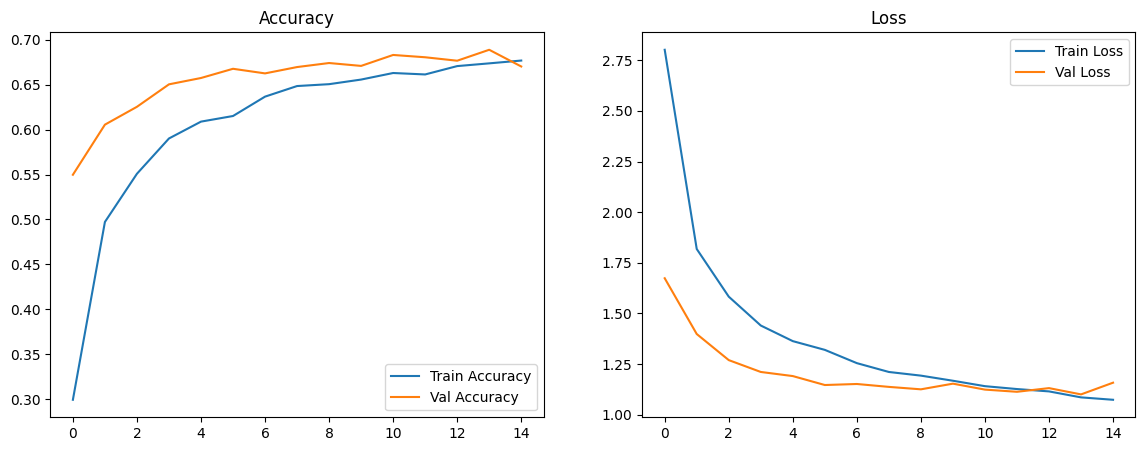

In [17]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# ======================
# 1. PATHS
# ======================
train_dir = "/content/datasets/mit_indoor/split/train"
val_dir = "/content/datasets/mit_indoor/split/val"
test_dir = "/content/datasets/mit_indoor/split/test"

# ======================
# 2. DATA GENERATORS
# ======================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

num_classes = train_generator.num_classes
print("Number of classes:", num_classes)

# ======================
# 3. LOAD BASE MODEL
# ======================
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False   # freeze base model for transfer learning

# ======================
# 4. ADD CLASSIFICATION HEAD
# ======================
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=outputs)

# ======================
# 5. COMPILE MODEL
# ======================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ======================
# 6. TRAIN MODEL
# ======================
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

# ======================
# 7. EVALUATE ON TEST SET
# ======================
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

# ======================
# 8. SAVE THE MODEL
# ======================
model.save("/content/mobilenetv2_indoor.h5")
print("Model saved successfully!")

# ======================
# 9. PLOT ACCURACY & LOSS
# ======================
plt.figure(figsize=(14,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.legend()

plt.show()
